In [58]:
from tensorflow.keras.layers import Dense

In [62]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [64]:
data = pd.read_csv('ec_data.csv')

data.head()

,temperature,humidity,wind_speed,solar_irradiance,energy_consumption
0,24.363503,31.107976,5.234114,705.432695,307.398145
1,38.767858,52.514057,4.939576,817.013257,412.444548
2,33.299849,72.376750,18.125092,325.421109,392.072418
3,29.966462,63.933493,4.990924,662.386690,119.254957
4,18.900466,68.393669,5.438995,614.571385,117.162261


In [66]:
data.isnull().sum()

temperature           0
humidity              0
wind_speed            0
solar_irradiance      0
energy_consumption    0
dtype: int64

In [68]:
X= data[['temperature', 'humidity', 'wind_speed','solar_irradiance']].values
y= data['energy_consumption'].values

In [70]:
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=0.2, random_state=42)

In [72]:
scaler= StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [74]:
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),  # Input layer with 64 neurons
    Dense(32, activation='relu'),  # Hidden layer with 32 neurons
    Dense(1)  # Output layer for regression (1 neuron)
])

/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [84]:
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

In [86]:
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2, verbose=1)

Epoch 1/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 88765.3125 - mae: 268.3543 - val_loss: 83453.8281 - val_mae: 258.5488
Epoch 2/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 86296.1484 - mae: 264.6171 - val_loss: 82695.1172 - val_mae: 257.0794
Epoch 3/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 88746.1641 - mae: 269.4538 - val_loss: 81517.3906 - val_mae: 254.7818
Epoch 4/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 82967.4375 - mae: 257.1230 - val_loss: 79744.3125 - val_mae: 251.2757
Epoch 5/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 82395.7812 - mae: 256.2311 - val_loss: 77165.5156 - val_mae: 246.0817
Epoch 6/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 79918.3828 - mae: 252.9945 - val_loss: 73597.1484 - val_mae: 238.6921
Epoch 7/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 79273.6875 - mae: 248.3064 - val_loss: 68925.8906 - val_mae: 228.6376
Epoch 8/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 71474.2969 - mae: 235.1991 - val_loss: 63148.4

In [88]:
test_loss, test_mae = model.evaluate(X_test, y_test, verbose=1)
print(f"Test Mean Absolute Error: {test_mae:.2f}")

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 17956.5098 - mae: 115.5323 
Test Mean Absolute Error: 115.87


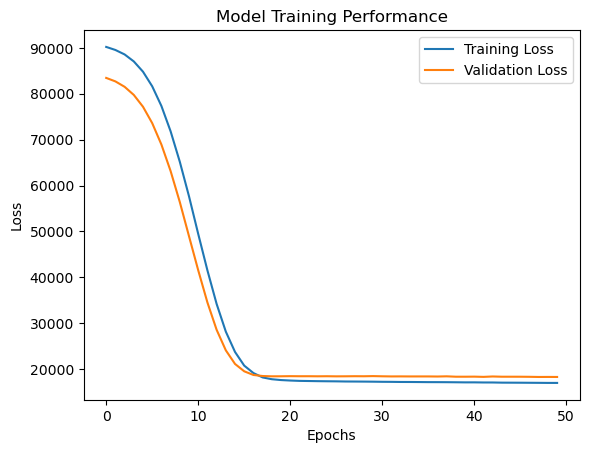

In [90]:
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Model Training Performance')
plt.legend()
plt.show()

In [92]:
predictions = model.predict(X_test)
predictions

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 


array([[285.7179 ],
       [248.15627],
       [261.8166 ],
       [209.64333],
       [336.1867 ],
       [304.52295],
       [314.0089 ],
       [286.30344],
       [288.97012],
       [284.25836],
       [237.37228],
       [270.0985 ],
       [276.6339 ],
       [238.14085],
       [297.9629 ],
       [315.12036],
       [259.42206],
       [307.0556 ],
       [301.93927],
       [251.09541],
       [278.5249 ],
       [283.97186],
       [279.91666],
       [271.95624],
       [252.34317],
       [245.97256],
       [266.68698],
       [321.1016 ],
       [318.58472],
       [265.547  ],
       [236.96034],
       [311.59088],
       [294.9805 ],
       [271.0951 ],
       [315.776  ],
       [290.39966],
       [215.98361],
       [270.65463],
       [282.2624 ],
       [250.17256],
       [248.06744],
       [258.18646],
       [246.71623],
       [259.6727 ],
       [259.80652],
       [268.9516 ],
       [272.14542],
       [257.24185],
       [298.96228],
       [288.19092],


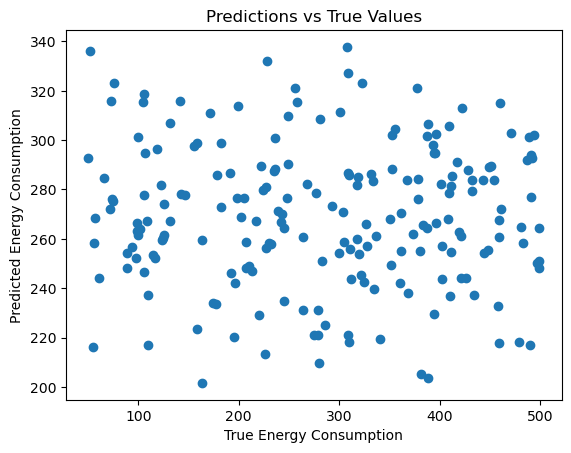

In [94]:
plt.scatter(y_test, predictions)
plt.xlabel('True Energy Consumption')
plt.ylabel('Predicted Energy Consumption')
plt.title('Predictions vs True Values')
plt.show()

In [ ]:
 bv